In [22]:
import pandas as pd

data_llama = pd.read_csv('/home/mmezzanzanica/project/scoring_autoint_align/3_analysis/NO_rerank_ndcg_all_layers_llama.csv')
data_llama.columns


Index(['index', 'description', 'layer',
       'ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct',
       'ndcg_Qwen/Qwen3-Embedding-8B_new', 'ndcg_Qwen/Qwen3-Embedding-8B',
       'ndcg_Qwen/Qwen3-Embedding-0.6B', 'ndcg_Qwen/Qwen3-Embedding-4B',
       'ndcg_Lajavaness/bilingual-embedding-large'],
      dtype='object')

In [23]:
import pandas as pd
import os

# Percorso ai file
#cartella = ""  # Cambia se necessario
suffissi = ['antonio', 'daniele', 'andrea', 'filippo']
valutazione_colonne = ['Soundness', '⁠Completeness'] # , 'Novelty', 'Parsimony'

# Funzione per estrarre il numero dal testo tipo "3: Rilevante"
def estrai_valore_numerico(val):
    if isinstance(val, str) and ':' in val:
        return int(val.split(':')[0].strip())
    return None

# DataFrame finale
df_finale = None

for nome in suffissi:
    #filepath = os.path.join(f"eval_{nome}.xlsx")
    df = pd.read_csv(f"eval_{nome}.csv")
    
    # Estrazione valori numerici
    for col in valutazione_colonne:
        df[col + '_num'] = df[col].apply(estrai_valore_numerico)
    
    # Calcolo media arrotondata
    media_col = f"media_{nome}"
    df[media_col] = df[[col + '_num' for col in valutazione_colonne]].mean(axis=1).round(2)
    
    if df_finale is None:
        df_finale = df[['id', 'description', 'url', 'layer']].copy()
    
    df_finale[media_col] = df[media_col]

# Calcolo della media tra i voti medi degli utenti
media_cols = [f"media_{nome}" for nome in suffissi]
df_finale["mean_vote"] = df_finale[media_cols].mean(axis=1).round(2)

# Salva il risultato se desideri
# df_finale.to_excel("valutazione_media.xlsx", index=False)

df_finale.head()

,id,description,url,layer,media_antonio,media_daniele,media_andrea,media_filippo,mean_vote
0,smuqtj03gin1a6ru2o9ujz5as,['references to comfort and softness in descri...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,2.0,2.5,4.0,3.5,3.00
1,p6t6vi763nhuek9psdd9a32aj,['references to the Associated Press and photo...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,2.0,2.0,3.0,2.5,2.38
2,qbbr79uggoahcp705djxuhb10,[' terms related to workspaces in a computatio...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,3.0,2.5,3.5,2.5,2.88
3,yehvcswpdjvxf44awd1dtzu9x,[' names of football players or related entiti...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,1.0,1.0,1.5,1.0,1.12
4,yj0cw47s9yuvxekbx4a4f26gc,"[' instances of the word ""mock"" or its variati...",https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,4.0,3.5,3.0,3.5,3.50


In [24]:
import pandas as pd
import itertools
import krippendorff

# Carica il dataframe
# df_finale = pd.read_csv('path_to_your_file.csv')  # se necessario

# Colonne dei valutatori (rimuovendo spazi eventuali)
valutatori = ['media_antonio', 'media_daniele', 'media_andrea', 'media_filippo']
#valutatori = [v.strip() for v in valutatori]  # per rimuovere eventuali spazi

# Filtra solo le colonne dei valutatori
ratings = df_finale[valutatori].to_numpy().T  # shape: (annotators, items)

# Calcolo alpha su tutti i valutatori
alpha_all = krippendorff.alpha(reliability_data=ratings, level_of_measurement='interval')
print(f"Krippendorff alpha (tutti i valutatori): {alpha_all:.3f}")

# Calcolo alpha per tutte le coppie
results = []
for a, b in itertools.combinations(valutatori, 2):
    pair_data = df_finale[[a, b]].to_numpy().T
    alpha_pair = krippendorff.alpha(reliability_data=pair_data, level_of_measurement='interval')
    results.append((a, b, alpha_pair))
    print(f"Krippendorff alpha ({a} vs {b}): {alpha_pair:.3f}")

# (Opzionale) Converti i risultati in DataFrame
df_results = pd.DataFrame(results, columns=['Valutatore 1', 'Valutatore 2', 'Krippendorff Alpha'])

Krippendorff alpha (tutti i valutatori): 0.555
Krippendorff alpha (media_antonio vs media_daniele): 0.453
Krippendorff alpha (media_antonio vs media_andrea): 0.600
Krippendorff alpha (media_antonio vs media_filippo): 0.538
Krippendorff alpha (media_daniele vs media_andrea): 0.507
Krippendorff alpha (media_daniele vs media_filippo): 0.445
Krippendorff alpha (media_andrea vs media_filippo): 0.724


In [25]:
df_score = pd.read_csv('score_llama.csv')
df_score

,id,modelId,true_description_x,layer,index,ndcg_emb_phi,score_gemini-2.0-flash,id_expl_gemini-2.0-flash,true_description_y,true_ndcg
0,smuqtj03gin1a6ru2o9ujz5as,llama3.1-8b,references to comfort and softness in descript...,0,7223,0.005397,0.950000,smuqtj03gin1a6ru2o9ujz5as,references to comfort and softness in descript...,0.308923
1,p6t6vi763nhuek9psdd9a32aj,llama3.1-8b,references to the Associated Press and photogr...,0,29280,0.005025,1.000000,p6t6vi763nhuek9psdd9a32aj,references to the Associated Press and photogr...,0.308720
2,qbbr79uggoahcp705djxuhb10,llama3.1-8b,terms related to workspaces in a computational...,0,18918,0.002850,0.970588,qbbr79uggoahcp705djxuhb10,terms related to workspaces in a computationa...,0.025885
3,yehvcswpdjvxf44awd1dtzu9x,llama3.1-8b,names of football players or related entities,0,21175,0.008177,0.333333,yehvcswpdjvxf44awd1dtzu9x,names of football players or related entities,0.039218
4,yj0cw47s9yuvxekbx4a4f26gc,llama3.1-8b,"instances of the word ""mock"" or its variation...",0,29495,0.004576,1.000000,yj0cw47s9yuvxekbx4a4f26gc,"instances of the word ""mock"" or its variation...",0.012964
...,...,...,...,...,...,...,...,...,...,...
95,d1gtu4h4p7y5r9s0q3u48j7yv,llama3.1-8b,numerical identifiers and codes related to art...,31,29361,0.111706,0.704545,d1gtu4h4p7y5r9s0q3u48j7yv,numerical identifiers and codes related to ar...,0.111706
96,shar0uwtzvt2unt8uavcoqbwb,llama3.1-8b,names and titles related to people and cultura...,31,29156,0.027638,0.812500,shar0uwtzvt2unt8uavcoqbwb,names and titles related to people and cultur...,0.027638
97,sk9b5i97op5nonb9qi18yg7n3,llama3.1-8b,references to musical performances and related...,31,29875,0.000020,0.625000,sk9b5i97op5nonb9qi18yg7n3,references to musical performances and relate...,0.000020
98,jdjhhu2q1vt1j9p7qdagekhpp,llama3.1-8b,technical terms related to telecommunications ...,31,29342,0.048112,0.857143,jdjhhu2q1vt1j9p7qdagekhpp,technical terms related to telecommunications...,0.048112


In [26]:
df_metrics = df_score.merge(df_finale, on='id', how='left')

In [27]:
df_metrics.rename(columns={'layer_x': 'layer'}, inplace=True)
df_metrics

,id,modelId,true_description_x,layer,index,ndcg_emb_phi,score_gemini-2.0-flash,id_expl_gemini-2.0-flash,true_description_y,true_ndcg,description,url,layer_y,media_antonio,media_daniele,media_andrea,media_filippo,mean_vote
0,smuqtj03gin1a6ru2o9ujz5as,llama3.1-8b,references to comfort and softness in descript...,0,7223,0.005397,0.950000,smuqtj03gin1a6ru2o9ujz5as,references to comfort and softness in descript...,0.308923,['references to comfort and softness in descri...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,2.0,2.5,4.0,3.5,3.00
1,p6t6vi763nhuek9psdd9a32aj,llama3.1-8b,references to the Associated Press and photogr...,0,29280,0.005025,1.000000,p6t6vi763nhuek9psdd9a32aj,references to the Associated Press and photogr...,0.308720,['references to the Associated Press and photo...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,2.0,2.0,3.0,2.5,2.38
2,qbbr79uggoahcp705djxuhb10,llama3.1-8b,terms related to workspaces in a computational...,0,18918,0.002850,0.970588,qbbr79uggoahcp705djxuhb10,terms related to workspaces in a computationa...,0.025885,[' terms related to workspaces in a computatio...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,3.0,2.5,3.5,2.5,2.88
3,yehvcswpdjvxf44awd1dtzu9x,llama3.1-8b,names of football players or related entities,0,21175,0.008177,0.333333,yehvcswpdjvxf44awd1dtzu9x,names of football players or related entities,0.039218,[' names of football players or related entiti...,https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,1.0,1.0,1.5,1.0,1.12
4,yj0cw47s9yuvxekbx4a4f26gc,llama3.1-8b,"instances of the word ""mock"" or its variation...",0,29495,0.004576,1.000000,yj0cw47s9yuvxekbx4a4f26gc,"instances of the word ""mock"" or its variation...",0.012964,"[' instances of the word ""mock"" or its variati...",https://neuronpedia.org/llama3.1-8b/0-llamasco...,0,4.0,3.5,3.0,3.5,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,d1gtu4h4p7y5r9s0q3u48j7yv,llama3.1-8b,numerical identifiers and codes related to art...,31,29361,0.111706,0.704545,d1gtu4h4p7y5r9s0q3u48j7yv,numerical identifiers and codes related to ar...,0.111706,[' numerical identifiers and codes related to ...,https://neuronpedia.org/llama3.1-8b/31-llamasc...,31,3.0,2.5,2.0,3.0,2.62
96,shar0uwtzvt2unt8uavcoqbwb,llama3.1-8b,names and titles related to people and cultura...,31,29156,0.027638,0.812500,shar0uwtzvt2unt8uavcoqbwb,names and titles related to people and cultur...,0.027638,[' names and titles related to people and cult...,https://neuronpedia.org/llama3.1-8b/31-llamasc...,31,1.0,1.0,1.0,2.0,1.25
97,sk9b5i97op5nonb9qi18yg7n3,llama3.1-8b,references to musical performances and related...,31,29875,0.000020,0.625000,sk9b5i97op5nonb9qi18yg7n3,references to musical performances and relate...,0.000020,[' references to musical performances and rela...,https://neuronpedia.org/llama3.1-8b/31-llamasc...,31,1.0,2.0,2.0,1.0,1.50
98,jdjhhu2q1vt1j9p7qdagekhpp,llama3.1-8b,technical terms related to telecommunications ...,31,29342,0.048112,0.857143,jdjhhu2q1vt1j9p7qdagekhpp,technical terms related to telecommunications...,0.048112,[' technical terms related to telecommunicatio...,https://neuronpedia.org/llama3.1-8b/31-llamasc...,31,3.0,2.5,1.0,2.0,2.12


In [28]:
df_finale = df_metrics.merge(data_llama, on=['index', 'layer'], how='left')
df_finale = df_finale[['index', 'layer','url','media_antonio','media_daniele','media_andrea','media_filippo', 'mean_vote', 'score_gemini-2.0-flash', 'ndcg_Lajavaness/bilingual-embedding-large','ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct', 'ndcg_Qwen/Qwen3-Embedding-8B_new', 'ndcg_Qwen/Qwen3-Embedding-8B', 'ndcg_Qwen/Qwen3-Embedding-0.6B', 'ndcg_Qwen/Qwen3-Embedding-4B']]

In [29]:
df_finale

,index,layer,url,media_antonio,media_daniele,media_andrea,media_filippo,mean_vote,score_gemini-2.0-flash,ndcg_Lajavaness/bilingual-embedding-large,ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct,ndcg_Qwen/Qwen3-Embedding-8B_new,ndcg_Qwen/Qwen3-Embedding-8B,ndcg_Qwen/Qwen3-Embedding-0.6B,ndcg_Qwen/Qwen3-Embedding-4B
0,7223,0,https://neuronpedia.org/llama3.1-8b/0-llamasco...,2.0,2.5,4.0,3.5,3.00,0.950000,1.902520e-01,2.758031e-01,3.317908e-01,2.765778e-01,2.124113e-01,3.371522e-01
1,29280,0,https://neuronpedia.org/llama3.1-8b/0-llamasco...,2.0,2.0,3.0,2.5,2.38,1.000000,5.202423e-01,2.820360e-01,5.216296e-01,4.927973e-01,4.816775e-01,4.504236e-01
2,18918,0,https://neuronpedia.org/llama3.1-8b/0-llamasco...,3.0,2.5,3.5,2.5,2.88,0.970588,1.748023e-03,2.745330e-02,2.824370e-02,3.761778e-02,8.372847e-02,5.642428e-02
3,21175,0,https://neuronpedia.org/llama3.1-8b/0-llamasco...,1.0,1.0,1.5,1.0,1.12,0.333333,1.048790e-02,3.586232e-02,4.389634e-02,4.191792e-02,3.893927e-02,3.465430e-02
4,29495,0,https://neuronpedia.org/llama3.1-8b/0-llamasco...,4.0,3.5,3.0,3.5,3.50,1.000000,1.656634e-01,1.063802e-02,1.214198e-01,1.567977e-01,1.312033e-01,2.051406e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29361,31,https://neuronpedia.org/llama3.1-8b/31-llamasc...,3.0,2.5,2.0,3.0,2.62,0.704545,7.607432e-02,9.500035e-02,8.360722e-02,7.595932e-02,9.853650e-02,9.812530e-02
96,29156,31,https://neuronpedia.org/llama3.1-8b/31-llamasc...,1.0,1.0,1.0,2.0,1.25,0.812500,2.815594e-02,1.984944e-02,6.572016e-03,1.120778e-02,3.635603e-02,1.156324e-02
97,29875,31,https://neuronpedia.org/llama3.1-8b/31-llamasc...,1.0,2.0,2.0,1.0,1.50,0.625000,5.557723e-10,5.200653e-18,5.836273e-13,6.317518e-11,5.636435e-11,1.348546e-12
98,29342,31,https://neuronpedia.org/llama3.1-8b/31-llamasc...,3.0,2.5,1.0,2.0,2.12,0.857143,1.227374e-01,1.189434e-01,1.573502e-01,1.388080e-01,1.480808e-01,1.487269e-01


In [30]:
df_finale.to_csv("no_rerank_llama_debug_eval.csv", index=False)

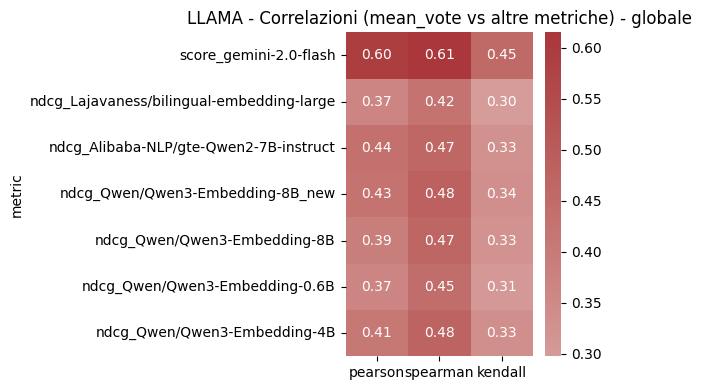

/tmp/ipykernel_1901206/4270192103.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


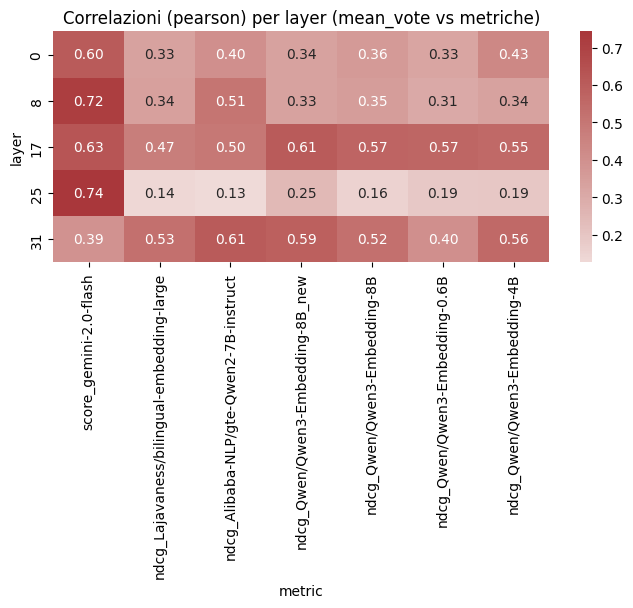

/tmp/ipykernel_1901206/4270192103.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


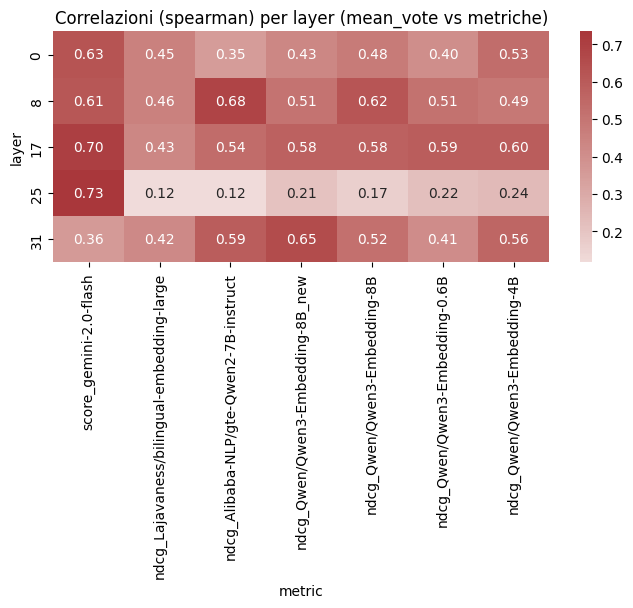

/tmp/ipykernel_1901206/4270192103.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


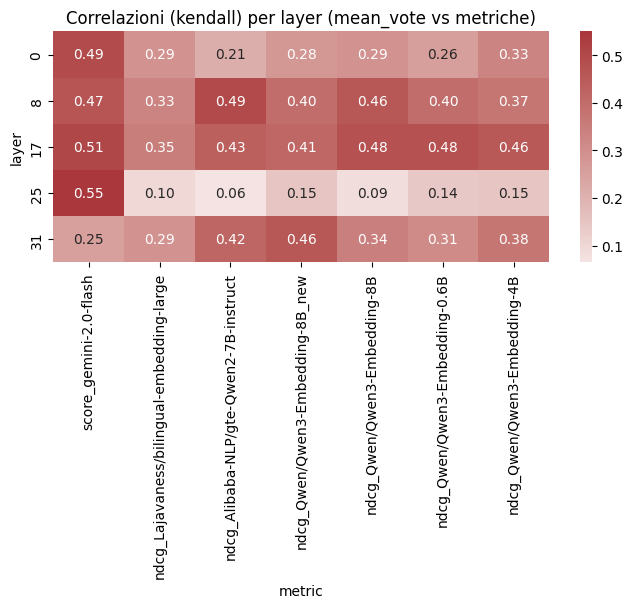

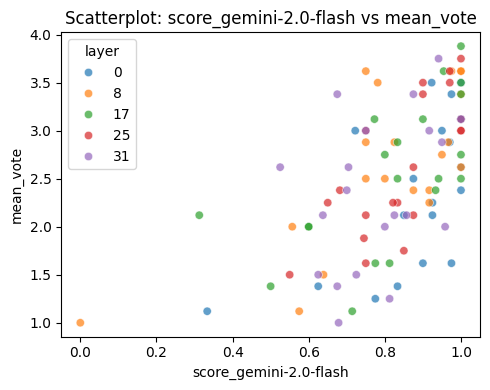

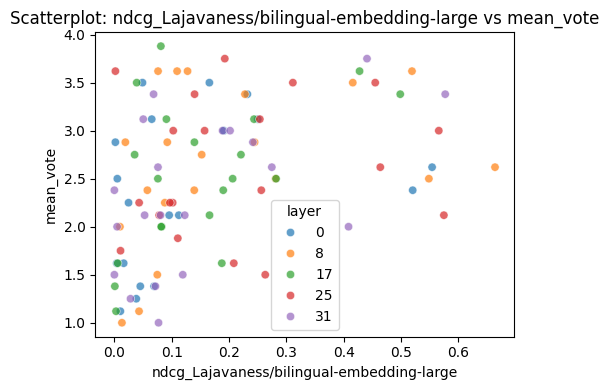

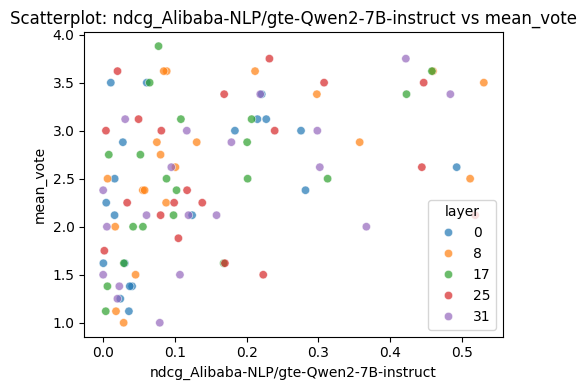

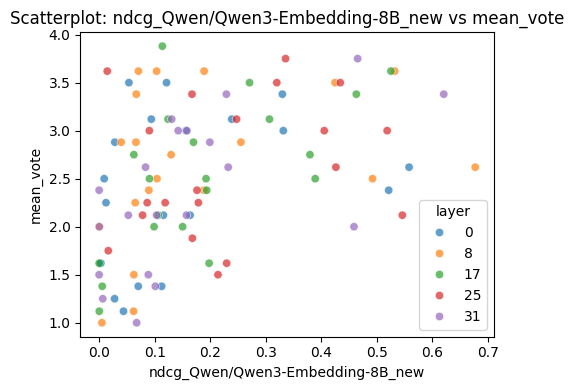

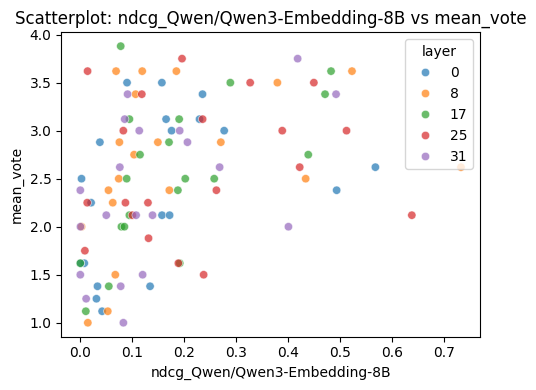

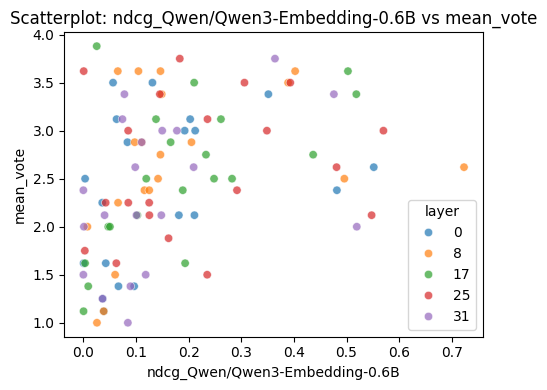

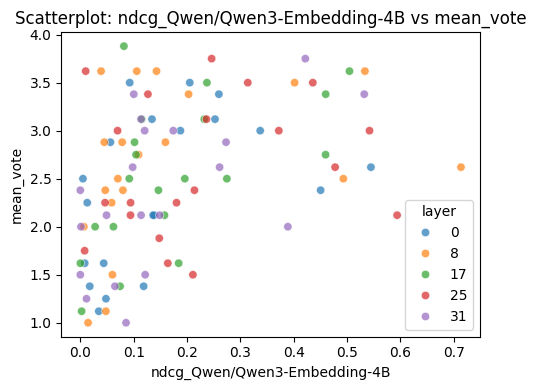

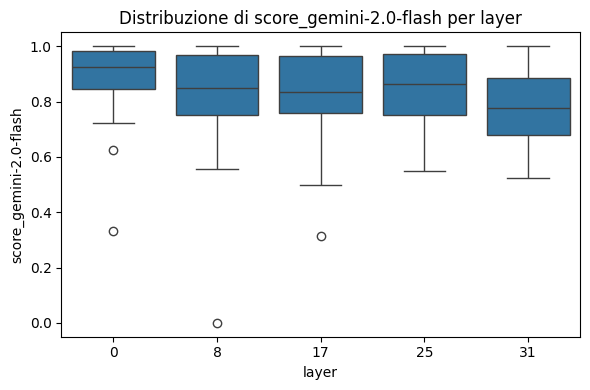

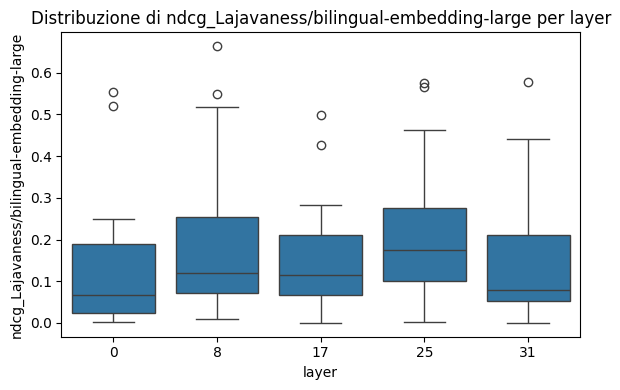

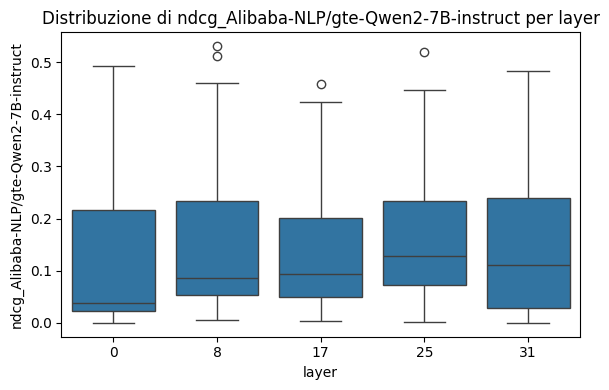

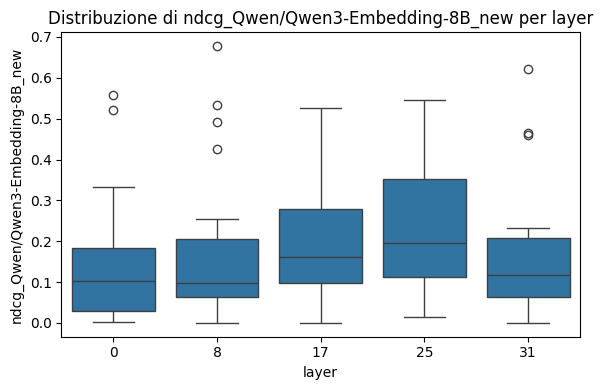

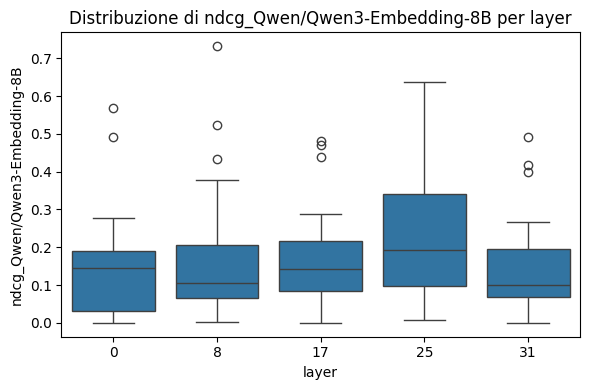

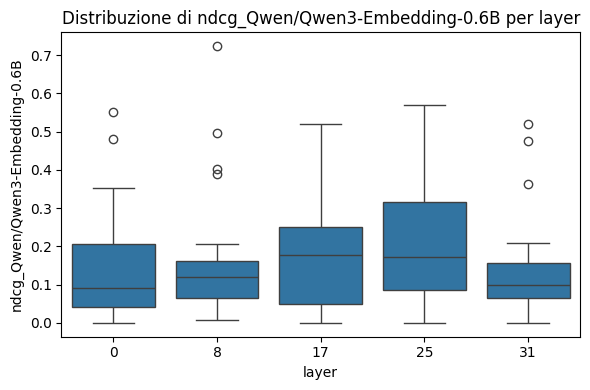

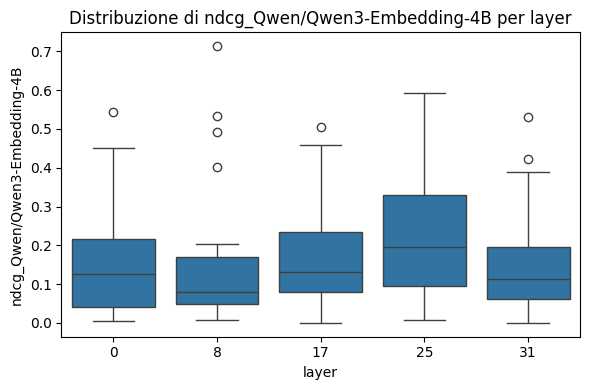

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

# Assumiamo che il tuo dataframe sia già caricato come df_finale

score_cols = [
    col for col in df_finale.columns
    if col.startswith("ndcg_") or col.startswith("score_")
]
target = "mean_vote"

# 1. HEATMAP DELLE CORRELAZIONI GLOBALE
corrs = []
for col in score_cols:
    mask = df_finale[[target, col]].notnull().all(axis=1)
    if mask.sum() > 0:
        pear = pearsonr(df_finale.loc[mask, target], df_finale.loc[mask, col])[0]
        spear = spearmanr(df_finale.loc[mask, target], df_finale.loc[mask, col]).correlation
        kend = kendalltau(df_finale.loc[mask, target], df_finale.loc[mask, col]).correlation
        corrs.append([col, pear, spear, kend])
corrs_df = pd.DataFrame(corrs, columns=["metric", "pearson", "spearman", "kendall"])
corrs_df.set_index("metric", inplace=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corrs_df, annot=True, cmap="vlag", center=0, fmt=".2f")
plt.title("LLAMA - Correlazioni (mean_vote vs altre metriche) - globale")
plt.tight_layout()
plt.show()

# 2. HEATMAP DELLE CORRELAZIONI PER LAYER
layers = sorted(df_finale["layer"].unique())
for stat in ["pearson", "spearman", "kendall"]:
    layer_corrs = []
    for layer in layers:
        temp = []
        df_layer = df_finale[df_finale["layer"] == layer]
        for col in score_cols:
            mask = df_layer[[target, col]].notnull().all(axis=1)
            if mask.sum() > 0:
                if stat == "pearson":
                    val = pearsonr(df_layer.loc[mask, target], df_layer.loc[mask, col])[0]
                elif stat == "spearman":
                    val = spearmanr(df_layer.loc[mask, target], df_layer.loc[mask, col]).correlation
                else:
                    val = kendalltau(df_layer.loc[mask, target], df_layer.loc[mask, col]).correlation
            else:
                val = None
            temp.append(val)
        layer_corrs.append(temp)
    corr_matrix = pd.DataFrame(layer_corrs, columns=score_cols, index=layers)
    plt.figure(figsize=(8, 3))
    sns.heatmap(corr_matrix, annot=True, cmap="vlag", center=0, fmt=".2f")
    plt.title(f"Correlazioni ({stat}) per layer (mean_vote vs metriche)")
    plt.xlabel("metric")
    plt.ylabel("layer")
    plt.tight_layout()
    plt.show()

# 3. SCATTERPLOT (mean_vote vs ogni metrica)
for col in score_cols:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df_finale, x=col, y=target, hue="layer", palette="tab10", alpha=0.7)
    plt.title(f"Scatterplot: {col} vs mean_vote")
    plt.tight_layout()
    plt.show()

# 4. BOXPLOT DELLE METRICHE PER LAYER
for col in score_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_finale, x="layer", y=col)
    plt.title(f"Distribuzione di {col} per layer")
    plt.tight_layout()
    plt.show()
